# Module 8 - Final Project

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. In module4 (Database) there also was an abbreviated example data story.  Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for you data story to a single, relatively simple perspective.

- Identify already available data that affords addressing your problem.  If using completely new data, know it well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments that explain the purpose of the operation(s).


Make your project unique by

- Comparing two or more different statistical/machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources.
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write a story around it.




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview the story you hope to uncover.

In [2]:
install.packages('Lahman')

library(Lahman)
library(dplyr)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [20]:
names(Batting)
peopleInfo <- People %>%
    select(playerID, birthYear, birthMonth, nameLast, nameFirst)

batting <- battingStats() %>%
        left_join(peopleInfo, by = "playerID") %>%
        mutate(age = yearID - birthYear - 1L *(birthMonth >= 10)) %>%
        arrange(playerID, yearID, stint)

bat2 <- batting %>% group_by(playerID) %>% filter(PA >= 250, mean(HR) > 10) %>% 
    mutate(Total_HR = sum(HR), startAge = min(age), currentAge = max(age), playTime = max(yearID) - min(yearID), HRper = mean(HR), potentialby42 = ((42 - currentAge) * HRper) + Total_HR) %>%
    select(playerID, G, AB, R, H, X2B, X3B, HR, RBI, SB, BB, BA, PA, TB, SlugPct, OBP, OPS, BABIP, age, Total_HR, startAge, currentAge, playTime, HRper, potentialby42)

bat3 <- na.omit(bat2)
sapply(bat3, function(x) sum(is.na(x)))

[1] "playerID" "yearID"   "stint"    "teamID"   "lgID"     "G"       
 [7] "AB"       "R"        "H"        "X2B"      "X3B"      "HR"      
[13] "RBI"      "SB"       "CS"       "BB"       "SO"       "IBB"     
[19] "HBP"      "SH"       "SF"       "GIDP"

playerID             G            AB             R             H 
            0             0             0             0             0 
          X2B           X3B            HR           RBI            SB 
            0             0             0             0             0 
           BB            BA            PA            TB       SlugPct 
            0             0             0             0             0 
          OBP           OPS         BABIP           age      Total_HR 
            0             0             0             0             0 
     startAge    currentAge      playTime         HRper potentialby42 
            0             0             0             0             0

In [4]:
#bat1 <- batting %>% group_by(playerID) %>% filter(max(yearID) == 2021) %>% 
    #summarize(Total_HR = sum(HR), currentAge = max(age), playTime = max(yearID) - min(yearID), HRper = mean(HR), potentialby42 = ((42 - currentAge) * HRper) + Total_HR) 

#bat1 %>% 
    #arrange(-potentialby42) 

In [5]:
library(tree)
frmla <- Total_HR ~ G + AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + IBB + HBP + SH + SF + GIDP + BA + PA + TB + SlugPct + OBP + OPS + BABIP + age + startAge + currentAge + playTime + HRper
tr <- tree(frmla, data = bat2)
summary(tr)
plot(tr)
text(tr)

ERROR: Error in eval(predvars, data, env): object 'CS' not found


In [6]:
library(e1071)

set.seed(123)

train_ind <- sample(seq_len(nrow(bat2)), size = nrow(bat2)*.7)
#bat2[train_ind,]
train <- bat2[train_ind,]
test <- bat2[-train_ind,]

m<- naiveBayes(frmla, data = train)
m

ERROR: Error in eval(predvars, data, env): object 'CS' not found


In [7]:
library(tidyr)
bat3 <- bat2 %>% select(playerID, G, AB, R, H, X2B, X3B, HR, RBI, SB, BB, BA, PA, TB, SlugPct, OBP, OPS, BABIP, age, Total_HR, startAge, currentAge, playTime, HRper, potentialby42)
sapply(bat3, function(x) sum(is.na(x)))

nums<-sapply(bat3, is.numeric)
print(cor(bat3[ , nums], use = "na.or.complete"))
#nums <- sapply(bat3, as.numeric)
#cor(bat3[ , nums])


playerID             G            AB             R             H 
            0             0             0             0             0 
          X2B           X3B            HR           RBI            SB 
            0             0             0             0            29 
           BB            BA            PA            TB       SlugPct 
            0             0             0             0             0 
          OBP           OPS         BABIP           age      Total_HR 
            0             0             0             0             0 
     startAge    currentAge      playTime         HRper potentialby42 
            0             0             0             0             0

                        G         AB           R           H         X2B
G              1.00000000  0.9211921  0.72061268  0.82572948  0.65601148
AB             0.92119207  1.0000000  0.81089194  0.93399559  0.74258023
R              0.72061268  0.8108919  1.00000000  0.86492724  0.71510462
H              0.82572948  0.9339956  0.86492724  1.00000000  0.79901515
X2B            0.65601148  0.7425802  0.71510462  0.79901515  1.00000000
X3B            0.30161498  0.3851419  0.46053466  0.46408953  0.28905997
HR             0.46677083  0.4579384  0.59199808  0.44499523  0.37634784
RBI            0.67207404  0.7196650  0.77200915  0.76781942  0.64823851
SB             0.24967463  0.3285494  0.42835509  0.34431040  0.23014066
BB             0.53658566  0.4780521  0.65396730  0.46867144  0.39080002
BA             0.25556340  0.3743398  0.56600162  0.66839200  0.53953725
PA             0.92799792  0.9872325  0.84843509  0.92594693  0.74013752
TB             0.79986779  0.8793960  0.90010422  0

In [8]:
frmla2 <- potentialby42 ~ G + AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + IBB + HBP + SH + SF + GIDP + BA + PA + TB + SlugPct + OBP + OPS + BABIP + age + startAge + currentAge + playTime
#HR + RBI + TB + SlugPct + OPS + currentAge + playTime + HRper
tr2 <- tree(frmla2, data = bat2)
summary(tr2)
plot(tr2)
text(tr2)

ERROR: Error in eval(predvars, data, env): object 'CS' not found


In [21]:
library(caret)
prunefrmla2 <- potentialby42 ~ HR + startAge + playTime

train_ind <- sample(seq_len(nrow(bat3)), size = nrow(bat2)*.7)
#bat2[train_ind,]
train2 <- bat3[train_ind,]
test2 <- bat3[-train_ind,]

In [22]:
m4 <- train(prunefrmla2, train2, method = 'lm')
summary(m4)
m5 <- train(prunefrmla2, test2, method = 'lm')
summary(m5)

coef(m4$finalModel)




Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-275.53  -65.26  -10.43   53.71  478.62 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 710.6300    18.9488  37.503  < 2e-16 ***
HR            6.6116     0.1296  50.997  < 2e-16 ***
startAge    -20.5392     0.7023 -29.248  < 2e-16 ***
playTime      2.0484     0.3465   5.911 3.61e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.75 on 5451 degrees of freedom
Multiple R-squared:  0.4412,	Adjusted R-squared:  0.4409 
F-statistic:  1435 on 3 and 5451 DF,  p-value: < 2.2e-16



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-235.09  -65.63   -8.35   57.20  401.76 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  662.763     28.283  23.433  < 2e-16 ***
HR             6.836      0.189  36.166  < 2e-16 ***
startAge     -19.175      1.048 -18.297  < 2e-16 ***
playTime       2.831      0.512   5.529 3.58e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 92.37 on 2334 degrees of freedom
Multiple R-squared:  0.4696,	Adjusted R-squared:  0.4689 
F-statistic: 688.7 on 3 and 2334 DF,  p-value: < 2.2e-16


(Intercept)          HR    startAge    playTime 
 710.629958    6.611561  -20.539176    2.048433


Regression tree:
tree(formula = prunefrmla2, data = bat3)
Number of terminal nodes:  7 
Residual mean deviance:  9915 = 77200000 / 7786 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-327.50  -71.55  -16.66    0.00   56.87  508.10 

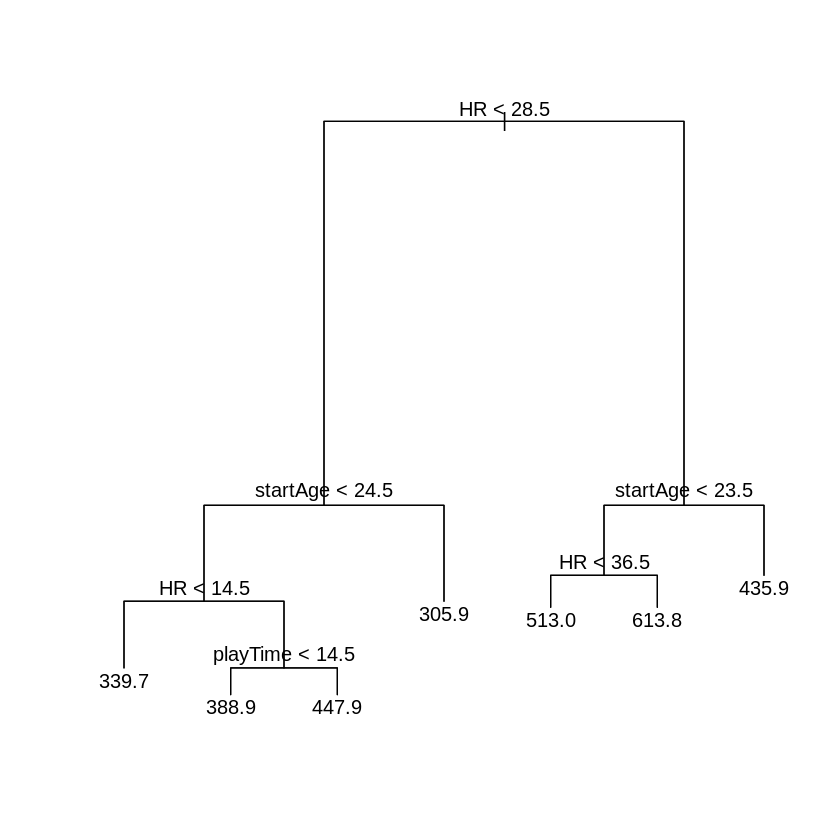

In [23]:
bat3 <- na.omit(bat2)


tr3 <- tree(prunefrmla2, data = bat3)
summary(tr3)
plot(tr3)
text(tr3)

In [24]:
coef.icept <- coef(m5$finalModel)[1]
coef.slope <- coef(m5$finalModel)[2]
class_coefs <- coef(m5$finalModel)[3]
bat3$pred <- predict(m4, bat3, na.action = na.omit)
bat3$testpred<-predict(m5, newdata=bat3, na.action = na.omit)

bat3

playerID,G,AB,R,H,X2B,X3B,HR,RBI,SB,⋯,BABIP,age,Total_HR,startAge,currentAge,playTime,HRper,potentialby42,pred,testpred
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
aaronha01,122,468,58,131,27,6,13,69,2,⋯,0.281,20,755,20,42,22,32.82609,755.0000,430.8623,430.4147
aaronha01,153,602,105,189,37,9,27,106,3,⋯,0.313,21,755,20,42,22,32.82609,755.0000,523.4241,526.1245
aaronha01,153,609,106,200,34,14,26,92,2,⋯,0.325,22,755,20,42,22,32.82609,755.0000,516.8125,519.2880
aaronha01,151,615,118,198,27,6,44,132,1,⋯,0.298,23,755,20,42,22,32.82609,755.0000,635.8206,642.3435
aaronha01,153,601,109,196,34,4,30,95,4,⋯,0.316,24,755,20,42,22,32.82609,755.0000,543.2588,546.6337
aaronha01,154,629,116,223,46,7,39,123,8,⋯,0.338,25,755,20,42,22,32.82609,755.0000,602.7628,608.1614
aaronha01,153,590,102,172,20,11,40,126,16,⋯,0.265,26,755,20,42,22,32.82609,755.0000,609.3744,614.9978
aaronha01,155,603,115,197,39,10,34,120,21,⋯,0.317,27,755,20,42,22,32.82609,755.0000,569.7050,573.9793
aaronha01,156,592,127,191,28,6,45,128,15,⋯,0.304,28,755,20,42,22,32.82609,755.0000,642.4322,649.1799


In [25]:
bat3 %>% group_by(playerID) %>% summarize(potentialHR = mean(pred)) %>% arrange(-potentialHR)

playerID,potentialHR
<chr>,<dbl>
griffke02,572.2283
foxxji01,570.1593
rodrial01,566.1610
mayswi01,564.2163
aaronha01,561.9436
mantlmi01,557.8339
sosasa01,549.4244
stantmi03,547.1723
pujolal01,544.4519


In [ ]:
library(ggplot2)

bat3 <- batting %>% group_by(playerID) %>% filter(max(yearID) == 2021) %>% 
    mutate(Total_HR = sum(HR), currentAge = max(age), playTime = max(yearID) - min(yearID), HRper = mean(HR), potentialby42 = ((42 - currentAge) * HRper) + Total_HR)


bat4 <- bat3 %>% filter(potentialby42 > 600) %>% mutate(Cum_HR = cumsum(HR))
bat4 %>% arrange(-potentialby42)



In [ ]:
library(RColorBrewer)
#display.brewer.all(n = 9, type = "div", colorblindFriendly = TRUE)
options(repr.plot.width=8, repr.plot.height=8)

g <- bat4 %>% ggplot(aes(age, Cum_HR, color = nameLast)) + geom_line(size = 2, alpha = .8)
g + geom_segment(aes(x = currentAge, y = Total_HR, xend = 42, yend = potentialby42), alpha = .5, linetype = 'dashed') +
    scale_colour_brewer(palette = 'PuOr') + theme_minimal()



In [ ]:
bat5 <- bat3 %>% filter(potentialby42 > 600) %>% mutate(Cum_HR = cumsum(HR))
bat5 %>% arrange(-potentialby42) 



In [ ]:
bat4 %>% distinct(playerID, .keep_all = TRUE) %>%
    ggplot(aes(nameLast, potentialby42)) + geom_bar(stat = 'identity', position = 'stack', aes(fill = Total_HR))



In [ ]:


#bat3$HR <- ifelse(bat3$yearID == 2020, bat3$HR * 2.7, bat3$HR)

#bat3 %>% filter(yearID == 2020) %>% select(HR)

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name(s) of the file(s) that are now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

## Step 5: Filter Results and Build and Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). 

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel (the slack course channel). 

Feel free to post more examples for people to look at and provide feedback. Your classmates will be vital providers of feedback in this process. Utilize them.

# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



# Save your notebook, then `File > Close and Halt`